<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/AI_HW_2_Data_Preprocessing_and_Visualization_Starting_file_REV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Data Preprocessing and Visualization with the Titanic Dataset

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml

###2. Load the Titanic Dataset

The Titanic dataset is a well-known dataset that contains information about passengers on the Titanic, including whether they survived or not. Here are some common features found in the Titanic dataset:


1. **pclass:** Passenger Class - The class of the ticket the passenger purchased (1st, 2nd, or 3rd).
2. **name:** The name of the passenger.
3. **sex:** The gender of the passenger (male or female).
4. **age:** The age of the passenger. This feature may contain missing values.
5. **sibsp:** The number of siblings/spouses aboard the Titanic.
6. **parch:** The number of parents/children aboard the Titanic.
7. **ticket:** The ticket number.
8. **fare:** The amount of money the passenger paid for the ticket.
9. **cabin:** The cabin number where the passenger stayed. This feature may contain missing values.
10. **embarked:** The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).
10. **boat:** This column indicates the lifeboat number for those passengers that were able to board a lifeboat.
11. **body:** The body identification number assigned to individuals who did not survive the disaster.  THIS COLUMN SHOULD BE DROPPED FOR SURVIVAL PREDICTION SINCE IT WAS ASSIGNED AFTER THE DISASTER TO THE RECOVERED DEAD BODIES.
12. **home.dest:** The home destination of the passenger.

The target variable in the dataset is typically:
14. **survived:** Indicates whether the passenger survived (1) or not (0).

It's important to note that the dataset may contain missing values in certain features, and preprocessing steps such as imputation or removal of missing data may be necessary before analysis. Additionally, some features may need further transformation, such as converting categorical variables into numerical representations for machine learning models.

In [ ]:
# Load the Titanic dataset from OpenML
titanic_data = fetch_openml(name='titanic', version=1, as_frame=True)

# Combine features and target into a DataFrame
df = pd.concat([titanic_data['data'], titanic_data['target']], axis=1)

### STUDENT START CODING BELOW HERE

### 3. EDA

In [ ]:
#@title 3A

# Add your code below
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
#@title 3B

# Add your code below
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   name       1309 non-null   object 
 2   sex        1309 non-null   int64  
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1309 non-null   int64  
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
 13  survived   1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 143.3+ KB


In [ ]:
#@title 3C - Missing Value Counts

# Add your code below

missing_value = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_value_percentage = ((missing_value / len(df)) * 100).round(2)

# Combine both into a DataFrame for better visualization
missing_value_df = pd.DataFrame({'Missing Values': missing_value, 'Percentage Missing': missing_value_percentage})

# Display the result
print(missing_value_df)




           Missing Values  Percentage Missing
pclass                  0                0.00
name                    0                0.00
sex                     0                0.00
age                   263               20.09
sibsp                   0                0.00
parch                   0                0.00
ticket                  0                0.00
fare                    1                0.08
cabin                1014               77.46
embarked                0                0.00
boat                  823               62.87
body                 1188               90.76
home.dest             564               43.09
survived                0                0.00


In [ ]:
#@title 3D

# The number of passengers who survived
df["survived"] = df["survived"].astype(int)
number_survived = df[df["survived"] == 1].shape[0]
print(f"Number of survivors: {number_survived}")

# The number of passengers who died
number_died = df[df["survived"] == 0].shape[0]
print(f"Number of people who died: {number_died}")

# The percentage of survivors who boarded a lifeboat
survivors_in_lifeboat = df[(df["survived"] == 1) & (df["boat"].notna())].shape[0]
if number_survived > 0:
    lifeboat_percentage = (survivors_in_lifeboat / number_survived) * 100
else:
    lifeboat_percentage = 0
print(f"Percentage of survivors in lifeboats: {lifeboat_percentage:.2f}%")

# The percentage of those who died whose bodies were recovered
bodies_recovered = df[df["body"].notna() & (df["survived"] == 0)].shape[0]
if number_died > 0:
    recovered_percentage = (bodies_recovered / number_died) * 100
else:
    recovered_percentage = 0  # If no deaths, set percentage to 0
print(f"Percentage of bodies recovered: {recovered_percentage:.2f}%")



Number of survivors: 500
Number of people who died: 809
Percentage of survivors in lifeboats: 95.40%
Percentage of bodies recovered: 14.96%


In [ ]:
#@title 3E - Delete 'boat' and 'body'

# Drop the 'Boat' and 'Body' columns from the dataset
df_cleaned = df.drop(columns=["boat", "body"])

# Verify that the columns have been removed
print(df_cleaned.columns)



Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'home.dest', 'survived'],
      dtype='object')


In [ ]:
#@title 3F - Encoding

# Check the data types and identify categorical columns
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding 'sex' column
df['sex'] = le.fit_transform(df['sex'])
print(df[['sex']].head())

# Encoding 'embarked' column
df['embarked'] = le.fit_transform(df['embarked'])
print(df[['embarked']].head())


pclass          int64
name           object
sex             int64
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked        int64
boat           object
body          float64
home.dest      object
survived     category
dtype: object
   sex
0    0
1    1
2    0
3    1
4    0
   embarked
0         2
1         2
2         2
3         2
4         2


###3G - Data Visualizations

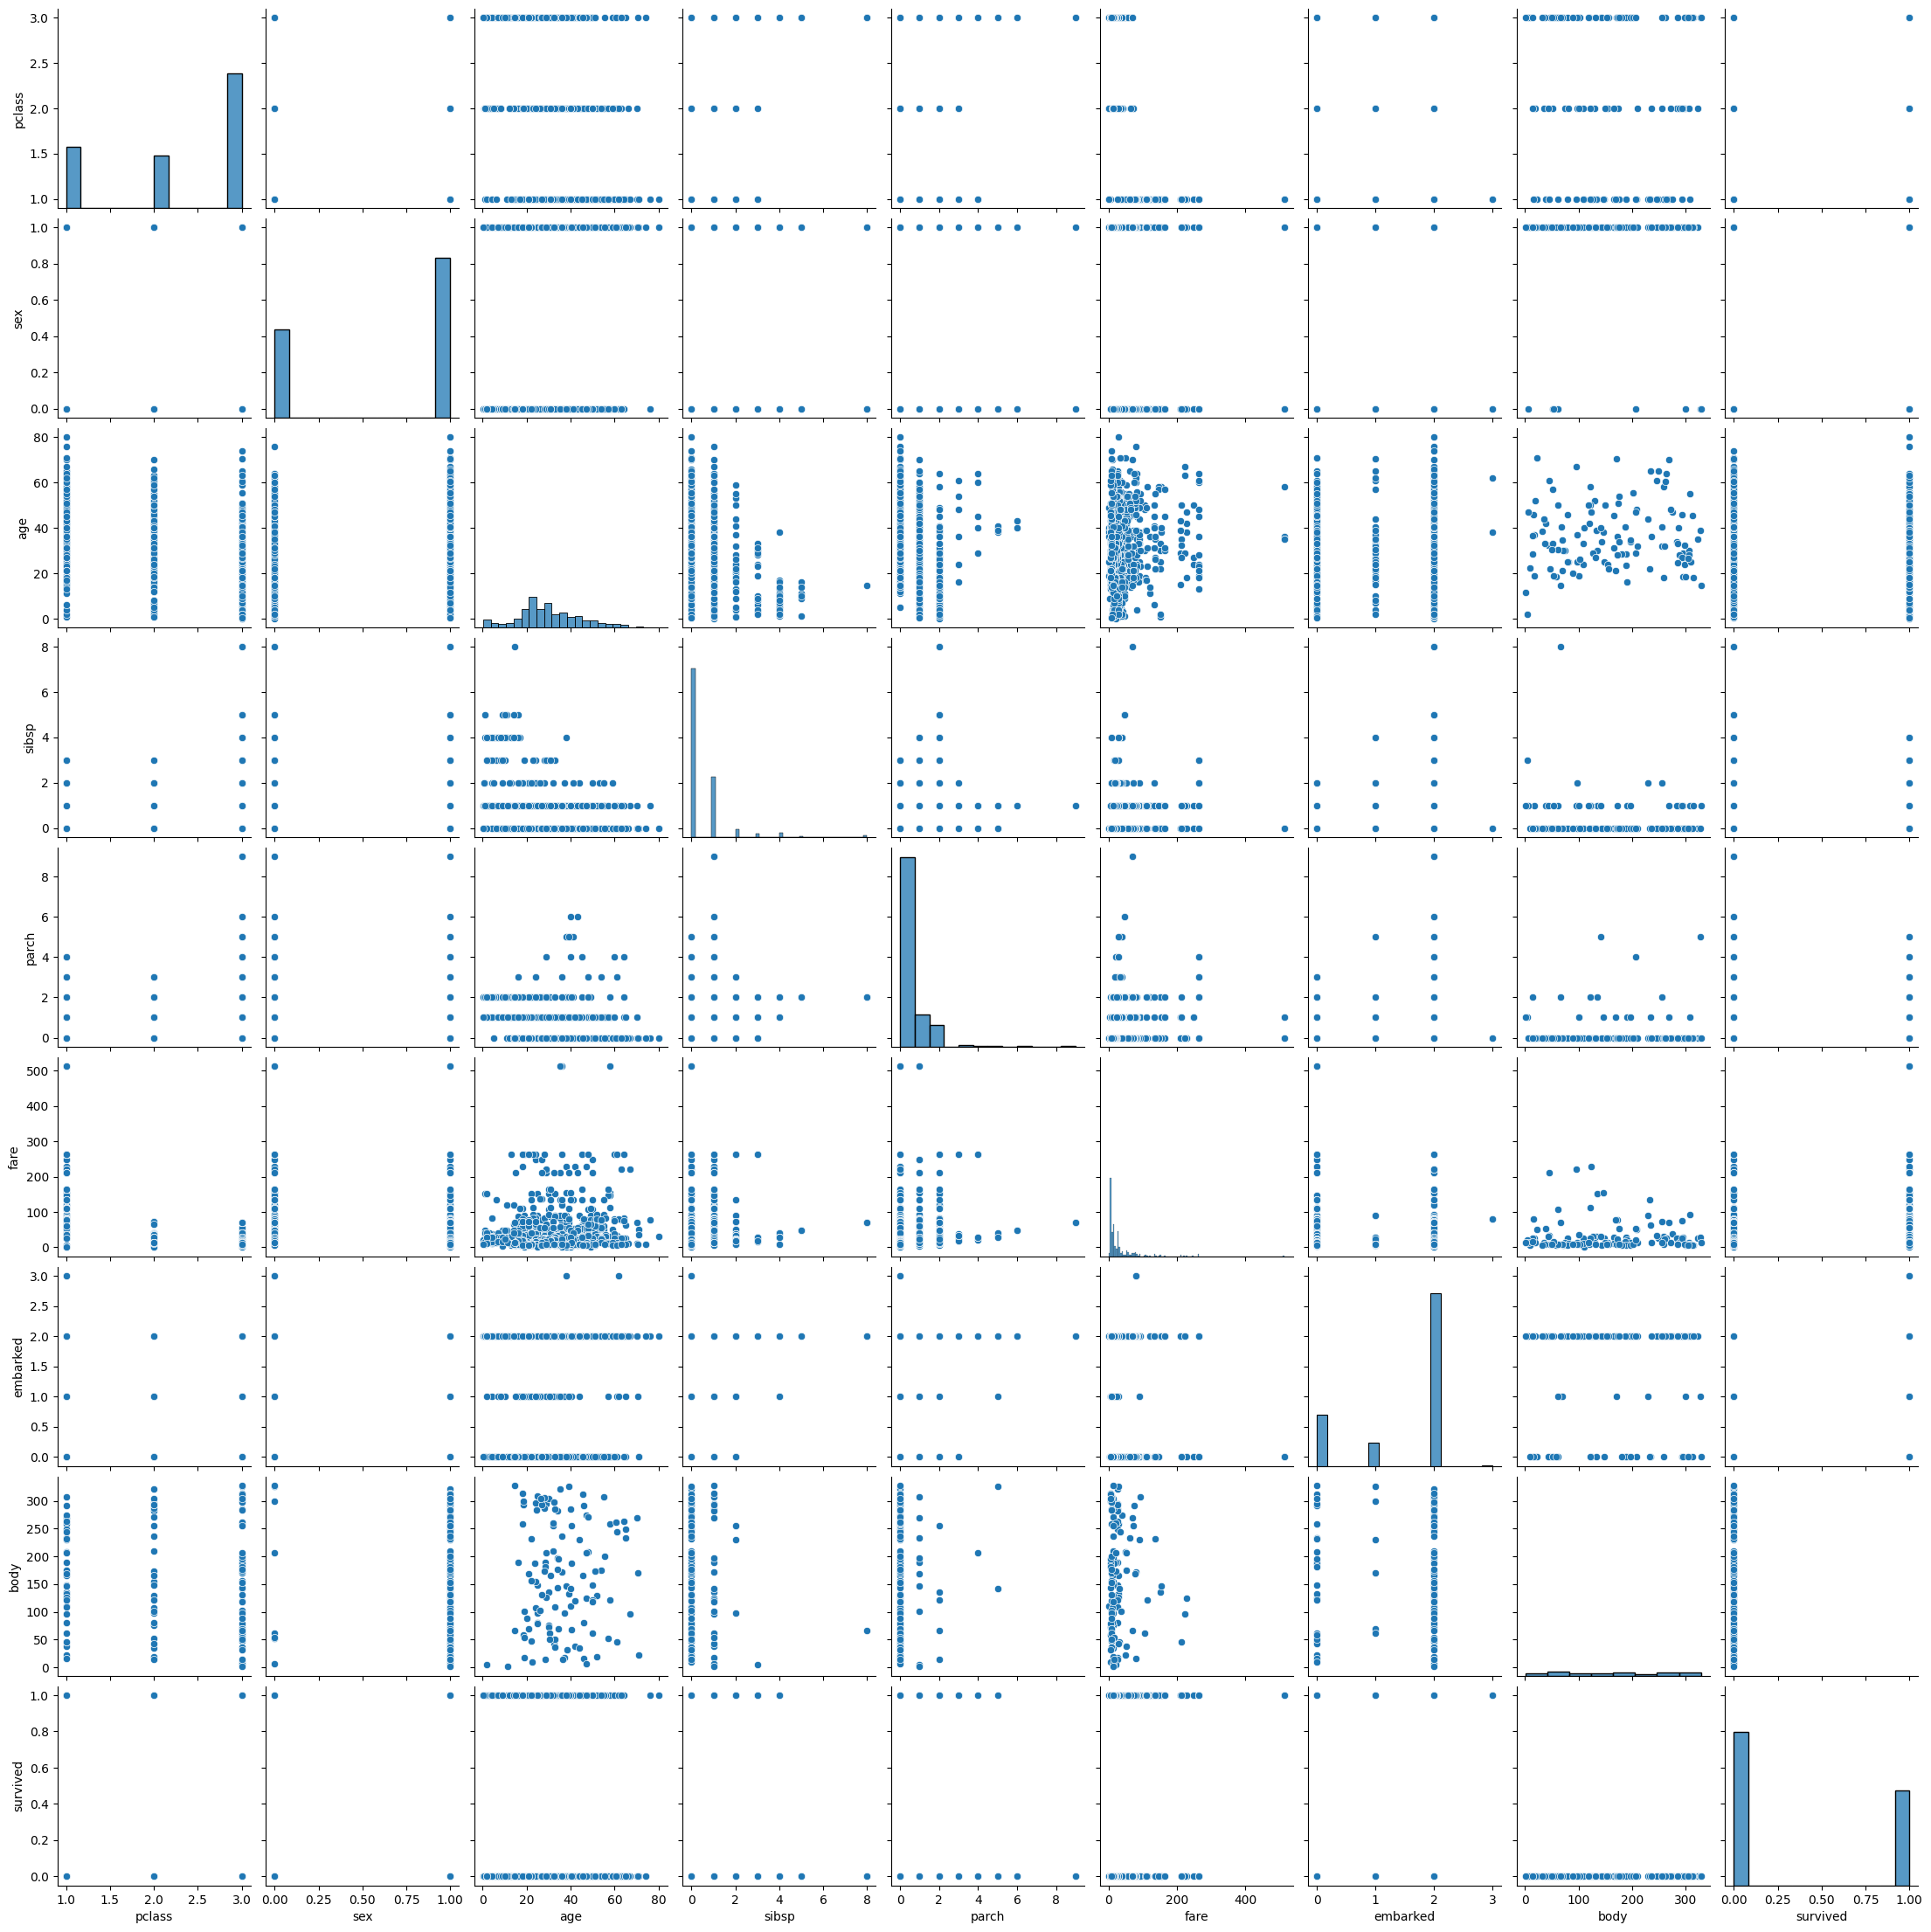

In [ ]:
# Select only numeric columns for the pair plot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create the pair plot
sns.pairplot(df[numeric_cols])

# Display the plot
plt.show()



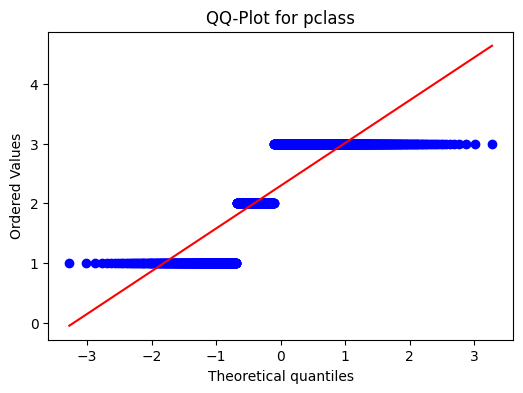

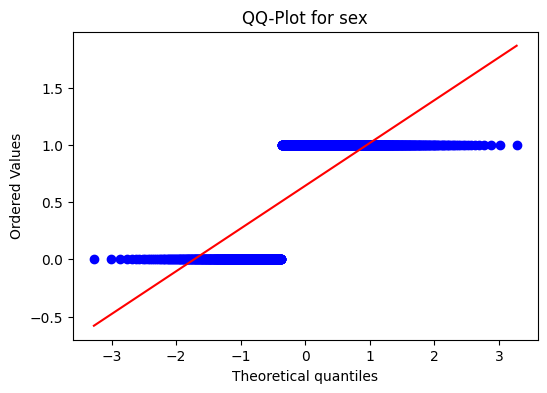

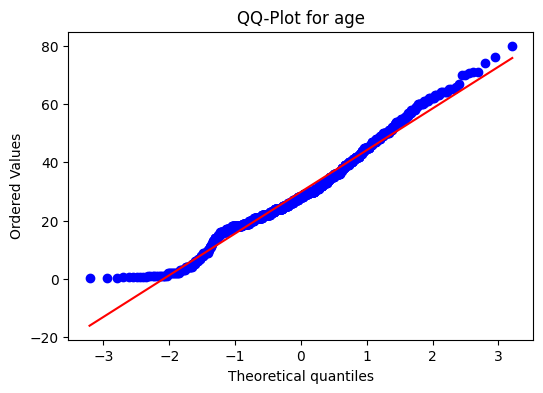

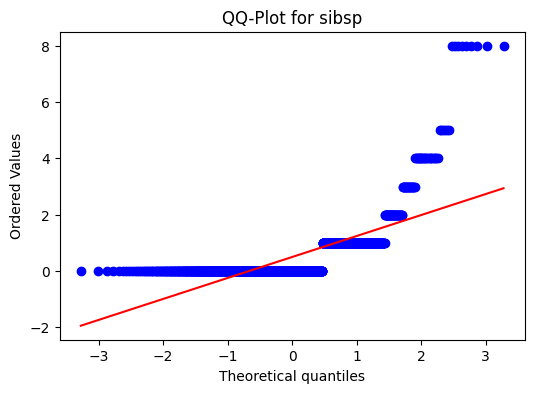

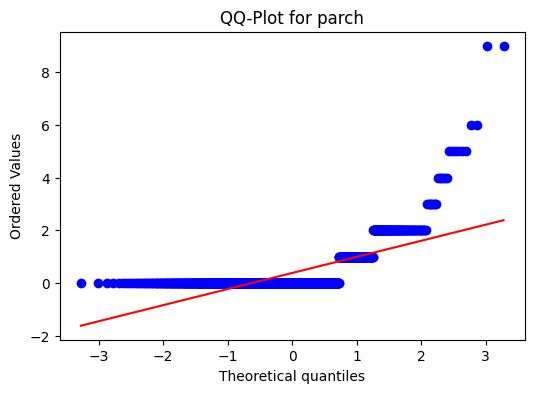

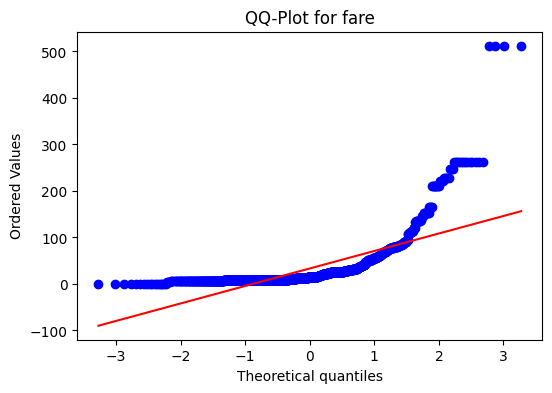

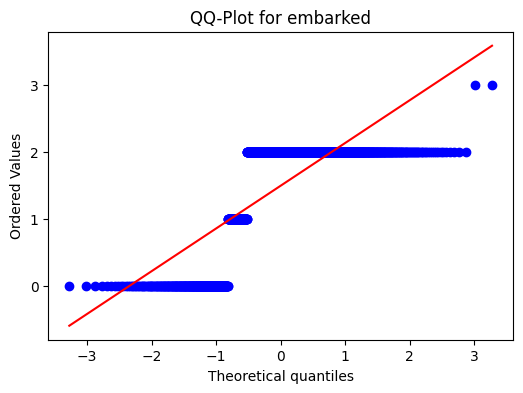

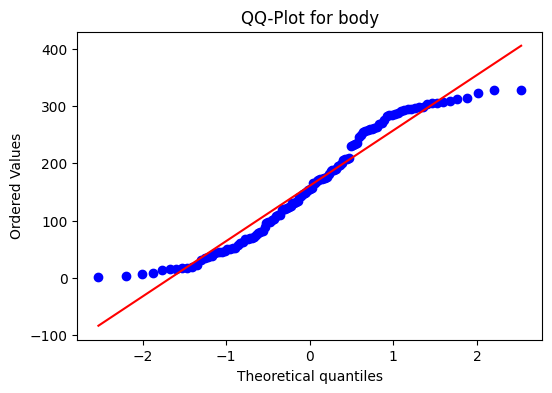

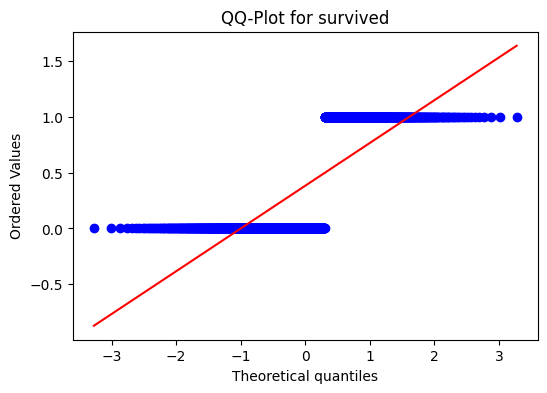

In [ ]:
# Display visualizations by qq-plots
import scipy.stats as stats

def QQplot_for_df(X):
    # Select only numeric columns (float64 and int64)
    features = X.select_dtypes(include=['float64', 'int64']).columns

    # Loop over the numeric columns and plot the QQ-plot for each
    for feature in features:
        plt.figure(figsize=(6, 4))
        stats.probplot(X[feature].dropna(), dist="norm", plot=plt)  # Drop NaN values for plotting
        plt.title(f'QQ-Plot for {feature}')
        plt.show()

QQplot_for_df(df)



### 4 - Data Preprocessing

In [ ]:
#@title 4A - Delete unhelpful features

# List of features to drop (non-predictive or irrelevant features)
features_to_drop = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']

# Drop the irrelevant features
df_cleaned = df.drop(columns = features_to_drop)

print(df_cleaned.columns)





Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')


In [ ]:
#@title 4B - Handle missing values

# Check for missing values in the cleaned dataframe
missing_data = df_cleaned.isnull().sum()
missing_percentage = ((missing_data / len(df_cleaned)) * 100).round(2)
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage Missing': missing_percentage})
print(missing_summary)

# Impute missing values in 'age' with the median
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())

# Impute missing values in 'fare' with the median
df_cleaned['fare'] = df_cleaned['fare'].fillna(df_cleaned['fare'].median())

# Verify that missing values are handled
print(df_cleaned.isnull().sum())






          Missing Values  Percentage Missing
pclass                 0                0.00
sex                    0                0.00
age                  263               20.09
sibsp                  0                0.00
parch                  0                0.00
fare                   1                0.08
embarked               0                0.00
survived               0                0.00
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64


#### Regarding Imputation

The most successful way to handle missing values, including age in the Titanic dataset, depends on various factors, including the characteristics of the data and the goals of the analysis. Here are some common approaches that have been used:

1. **Mean/Median Imputation:** Replace missing values with the mean or median of the available values. Median imputation is less sensitive to outliers and skewed distributions than mean imputation.

   ```python
   median_age = df['age'].median()
   df['age'].fillna(median_age, inplace=True)
   ```

2. **Machine Learning-based Imputation:** Use advanced imputation techniques, such as regression models or machine learning algorithms, to predict missing values based on other features. This approach takes into account relationships between variables.

3. **Group-wise Imputation:** Impute missing values based on specific groups or categories in the data. For example, impute ages based on the median age within different passenger classes or embarkation ports.

4. **Random Imputation:** Generate random values based on the distribution of the available data. This method introduces some variability and can be suitable when the distribution is not strongly skewed.

5. **Multiple Imputation:** Generate multiple imputations and analyze the data multiple times to account for uncertainty in the imputed values. This is particularly useful in statistical analyses.

It's important to note that there is no one-size-fits-all solution, and the choice of method depends on the specific characteristics of the data and the goals of the analysis. Additionally, always be aware of potential biases introduced by imputation and consider validating the chosen method.

In practice, the choice of imputation method may depend on the nature of the dataset and the analysis goals. Researchers and analysts often assess the impact of different imputation strategies on their specific analyses and choose the method that provides the most reasonable and unbiased results for their particular context.

### 5. Feature Engineering

In [ ]:
#@title 5A - Create at least one engineered feature

# Create a new feature 'family_size' by combining 'sibsp' and 'parch'
# Adding 1 to include the passenger themselves
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Display the first few rows to verify the new feature
df[['sibsp', 'parch', 'family_size']].head()




,sibsp,parch,family_size
0,0,0,1
1,1,2,4
2,1,2,4
3,1,2,4
4,1,2,4


### 5B  Family Size Feature
I created a new feature called "family_size," which combines the number of siblings/spouses aboard (sibsp) and the number of parents/children aboard (parch), adding 1 to include the passenger themselves.

This feature could provide useful information about the likelihood of survival, as passengers with larger families might have had different survival rates based on the policies at the time and the likelihood of being together during evacuation. Larger families could have been more likely to stay together and board lifeboats together, potentially improving their survival chances.


### 6. Data Visualization of Survival by Feature - 6A-6C

<ipython-input-30-8306771cc090>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='Blues')


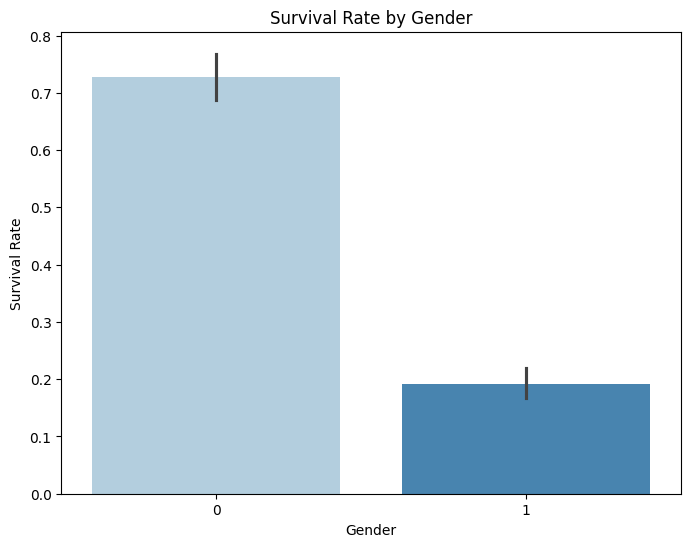

<ipython-input-30-8306771cc090>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette='Set2')


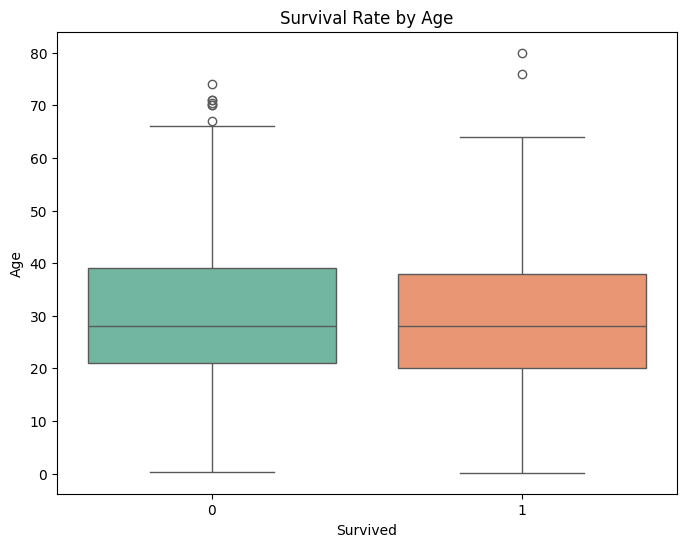

<ipython-input-30-8306771cc090>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='Purples')


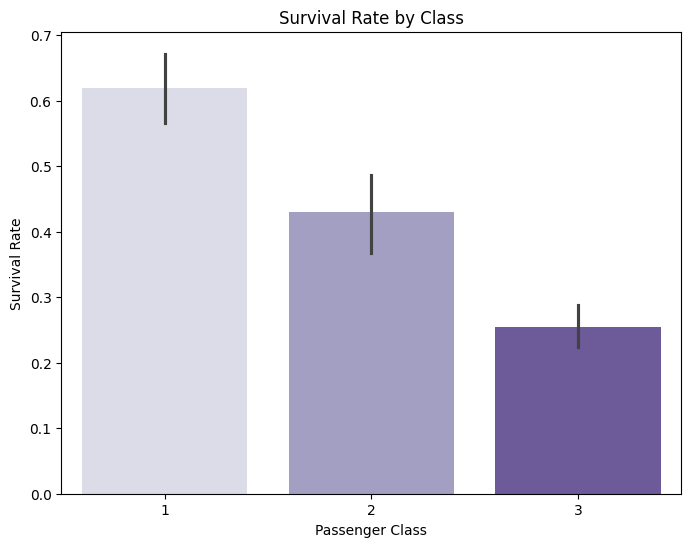

<ipython-input-30-8306771cc090>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='family_size', data=df, palette='coolwarm')


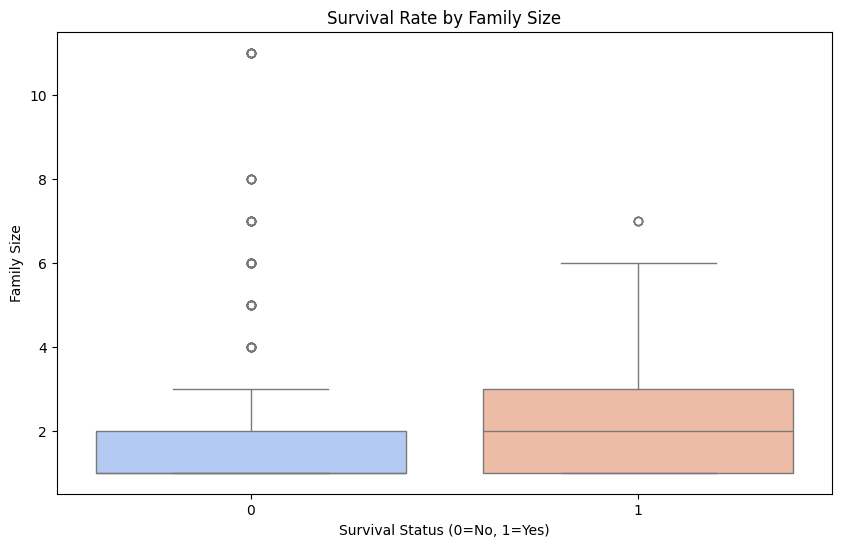

In [ ]:
# Plot survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, palette='Blues')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


# Plot survival rate by age
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df, palette='Set2')
plt.title('Survival Rate by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


# Plot survival rate by class (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, palette='Purples')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Plot survival rate by family size
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='family_size', data=df, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Survival Status (0=No, 1=Yes)')
plt.ylabel('Family Size')
plt.show()




### 7. Report

Survival Rate by Gender (Bar Plot):
This bar plot helps us understand the survival rate differences between male and female passengers. The survival rate for women can be as high as 72%, but around 19% for men. Apparently, female had higher survival rates.


Survival Rate by Age (Box Plot):
Those who survived were concentrated in age between 20 and 38, and those who died were concentrated in age between 21 and 39. This suggests that age has a small effect on survival rate, but not a significant one.
But more non-survivors between the ages of 66 and 74 or so which shows a lot of outliers in the box plot. It is speculated that many older people have voluntarily given up the chance to get into the lifeboat, leaving the chance of survival to children and young people.


Survival Rate by Class (Bar Plot):
The passenger class has a significant influence on survival rate. The survival rate in first class is around 62%, second class is around 42% and third class is only 24%. It means first-class passengers had a better chance of survival due to priority access to lifeboats, while third-class passengers may have been less fortunate.


Survival Rate by Family Size (Box Plot):
The family size has certain degree of impact on survival chance.
Small families (family Size = 1-3) (especially families with children) may have a higher survival rate. This is because the rescue process follows the principle of "women and children first". And family members may help each other.
Large families (family Size > 4) may have lower survival rates because rescue resources are limited and it may be difficult to save all family members. In addition, large families may have a harder time coordinating escapes.
Passengers traveling alone (family Size = 1) may have a lower survival rate because they do not have family members to help or support them.
